In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
merged = pd.read_csv('final_data.csv')

merge = merged.rename(columns={'Unnamed: 0' : 'Index'})
merged = merge.drop('Index', axis=1)
merged

,index,district_1,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,...,dead,injury,property_damage,location_category_1,location_category_2,location_category_3,month_y,ym,hour,season
0,0,서울특별시,종로구,108,3.8,-5.1,8.9,0.0,3.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,서울특별시,종로구,108,1.8,-4.3,6.1,0.0,4.9,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,서울특별시,종로구,108,-0.4,-7.1,6.7,0.0,3.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,서울특별시,종로구,108,-0.7,-8.7,8.0,0.0,3.5,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,서울특별시,종로구,108,1.6,-5.6,7.2,0.0,3.6,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539574,558231,강원특별자치도,양양군,670,6.6,-3.0,9.6,0.0,4.1,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539575,558232,강원특별자치도,양양군,670,7.4,-3.8,11.2,0.0,6.5,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539576,558233,강원특별자치도,양양군,670,9.3,1.6,7.7,0.0,7.2,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539577,558234,강원특별자치도,양양군,670,6.0,1.4,4.6,0.5,5.8,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 데이터의 피처 파악
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539579 entries, 0 to 539578
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       539579 non-null  int64  
 1   district_1                  539579 non-null  object 
 2   district_2                  539579 non-null  object 
 3   stn                         539579 non-null  int64  
 4   ta_max                      539579 non-null  float64
 5   ta_min                      539579 non-null  float64
 6   ta_max_min                  539579 non-null  float64
 7   rn_day                      539579 non-null  float64
 8   ws_max                      539579 non-null  float64
 9   ws_ins_max                  539579 non-null  float64
 10  ws_mean                     539579 non-null  float64
 11  ws_min                      539579 non-null  float64
 12  hm_max                      539579 non-null  float64
 13  hm_mean       

In [3]:
# 태백산맥 일대 데이터 불러오기
gangwon = pd.read_csv('gangwon.csv')
gyeongbuk = pd.read_csv('gyeongbuk.csv')
taebaek_mountain = pd.read_csv('taebaek_mountain.csv')

In [4]:
# 태백산 데이터의 기상정보
taebaek_mountain.describe().iloc[:, 2:13].round(2)

,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean
count,22005.00,22005.00,22005.00,22005.00,22005.00,22005.00,22005.00,22005.00,22005.00,22005.00,22005.00
mean,447.09,18.01,6.98,11.03,3.52,4.47,8.23,1.73,0.36,85.59,66.43
std,294.18,9.82,10.62,4.39,13.27,1.58,3.14,0.86,0.50,15.20,17.67
min,105.00,-12.90,-24.00,0.70,0.00,0.00,0.40,0.00,0.00,18.70,10.80
25%,211.00,10.20,-1.20,7.90,0.00,3.40,6.00,1.10,0.00,79.90,53.80
50%,217.00,19.20,7.00,10.70,0.00,4.20,7.70,1.50,0.20,91.30,69.50
75%,801.00,26.00,16.20,13.90,0.10,5.20,9.90,2.20,0.50,96.40,80.10
max,876.00,40.00,30.60,25.80,332.90,24.20,34.00,9.20,5.80,100.00,100.00


In [5]:
# 전체 데이터의 기상정보
merged.describe().iloc[:, 2:13].round(2)

,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
count,539579.00,539579.00,539579.00,539579.00,539579.00,539579.00,539579.00,539579.00,539579.00,539579.00,539579.00
mean,19.00,8.63,10.38,3.79,4.17,7.42,1.67,0.34,87.23,68.17,45.58
std,9.78,10.50,4.11,14.15,1.70,2.91,0.96,0.54,13.39,16.06,19.09
min,-12.90,-25.40,0.00,0.00,0.00,0.00,0.00,0.00,14.50,9.60,1.00
25%,11.30,0.10,7.40,0.00,3.00,5.40,1.00,0.00,81.10,57.20,30.60
50%,20.30,8.60,10.10,0.00,3.90,6.90,1.50,0.10,92.10,69.80,44.30
75%,27.10,18.00,13.00,0.10,5.00,8.90,2.10,0.40,97.50,80.30,58.40
max,41.80,31.40,33.40,413.00,29.70,43.40,17.90,10.20,100.00,100.00,100.00


In [6]:
# 전체 중 화재발생 데이터
merged.query('not ym.isna()').describe().iloc[:, 2:13].round(2)

,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
count,50543.00,50543.00,50543.00,50543.00,50543.00,50543.00,50543.00,50543.00,50543.00,50543.00,50543.00
mean,18.15,6.23,11.92,1.80,4.38,7.72,1.74,0.34,82.97,60.67,36.64
std,9.60,9.94,4.28,10.68,1.68,2.85,0.93,0.53,15.13,15.91,17.13
min,-11.60,-22.20,0.00,0.00,0.00,0.10,0.00,0.00,16.50,10.10,1.00
25%,10.70,-1.60,8.80,0.00,3.20,5.70,1.10,0.00,74.10,49.30,23.20
50%,18.80,5.20,11.60,0.00,4.10,7.20,1.50,0.10,87.30,60.90,33.90
75%,25.70,14.20,14.80,0.00,5.30,9.20,2.20,0.40,95.30,72.40,47.60
max,41.00,31.10,28.30,342.40,29.70,37.10,11.30,7.20,100.00,100.00,99.90


In [7]:
# 태백산맥 중 화재발생 데이터
taebaek_mountain.query('not ym.isna()').describe().iloc[:, 2:13].round(2)

,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean
count,1519.00,1519.00,1519.00,1519.00,1519.00,1519.00,1519.00,1519.00,1519.00,1519.00,1519.00
mean,352.02,17.49,5.53,11.96,1.91,5.01,9.30,2.10,0.56,75.70,54.41
std,285.96,10.14,10.29,4.55,12.57,1.75,3.48,1.02,0.68,19.28,18.11
min,105.00,-9.80,-21.30,1.40,0.00,1.30,1.80,0.20,0.00,18.70,10.80
25%,105.00,9.30,-2.10,8.60,0.00,3.80,6.80,1.30,0.10,61.95,40.95
50%,216.00,17.90,4.50,11.30,0.00,4.80,8.80,1.90,0.30,81.60,53.90
75%,556.00,26.20,13.85,15.10,0.00,5.90,11.10,2.70,0.90,91.45,67.40
max,876.00,39.30,29.70,25.80,250.00,16.10,34.00,7.60,3.70,100.00,98.80


In [8]:
# 태백산맥 데이터 중 화재 x
taebaek_mountain.query('ym.isna()').describe().iloc[:, 2:13].round(2)

,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean
count,20486.00,20486.00,20486.00,20486.00,20486.00,20486.00,20486.00,20486.00,20486.00,20486.00,20486.00
mean,454.14,18.05,7.09,10.96,3.64,4.43,8.15,1.70,0.34,86.32,67.32
std,293.56,9.80,10.64,4.37,13.31,1.56,3.10,0.84,0.48,14.59,17.31
min,105.00,-12.90,-24.00,0.70,0.00,0.00,0.40,0.00,0.00,18.90,11.30
25%,211.00,10.30,-1.10,7.90,0.00,3.40,6.00,1.10,0.00,81.10,55.20
50%,526.00,19.20,7.20,10.70,0.00,4.20,7.60,1.50,0.10,91.80,70.50
75%,801.00,26.00,16.30,13.80,0.40,5.20,9.80,2.10,0.50,96.50,80.60
max,876.00,40.00,30.60,25.80,332.90,24.20,28.10,9.20,5.80,100.00,100.00


In [9]:
# 태백산의 화재 데이터 (범주형 변수들의 기초통계량)
fire_t = taebaek_mountain.query('not ym.isna()')
fire_t.iloc[:, 21:35].describe(include='all').round(2)

,tm,fire_type_1,fire_type_2,ignition_factor_category_1,ignition_factor_category_2,casualties,dead,injury,property_damage,location_category_1,location_category_2,location_category_3,month_y,ym
count,1519,1519,0.0,1519,1519,1519.00,1519.00,1519.00,1.519000e+03,1519,1519,1519,1519.00,1519
unique,1518,2,NaN,11,41,NaN,NaN,NaN,NaN,2,3,17,NaN,72
top,2021-06-08 13:18:00,기타(쓰레기 화재등),NaN,부주의,담배꽁초,NaN,NaN,NaN,NaN,기타,야외,기타야외,NaN,2018-02
freq,2,1118,NaN,1191,464,NaN,NaN,NaN,NaN,1118,1118,560,NaN,71
mean,NaN,NaN,NaN,NaN,NaN,0.06,0.00,0.06,2.070641e+05,NaN,NaN,NaN,5.46,NaN
std,NaN,NaN,NaN,NaN,NaN,1.07,0.06,1.04,4.887480e+06,NaN,NaN,NaN,3.46,NaN
min,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,1.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,3.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,5.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1.100000e+02,NaN,NaN,NaN,8.00,NaN


In [10]:
# 태백산맥 화재 데이터의 화재 유형 비율
type_t = fire_t.value_counts('fire_type_1', normalize=True).round(4)*100
factor_t = fire_t.value_counts(['ignition_factor_category_1', 'ignition_factor_category_2'], normalize=True).round(4)*100
location_t = fire_t.value_counts(['location_category_1','location_category_2','location_category_3'], normalize=True).round(4)*100

type_t.reset_index(name='prop(%)')

,fire_type_1,prop(%)
0,기타(쓰레기 화재등),73.6
1,임야,26.4


In [11]:
# merged_t 정의X 
# merged_t.value_counts(['ignition_factor_category_1', 'ignition_factor_category_2'], normalize=True).round(4)*100

In [12]:
# 태백산맥 화재 데이터의 화재 요인 비율
factor_t.reset_index(name='prop(%)')

,ignition_factor_category_1,ignition_factor_category_2,prop(%)
0,부주의,담배꽁초,30.55
1,부주의,쓰레기 소각,16.00
2,부주의,불씨/불꽃/화원방치,15.34
3,미상,미상,5.66
4,부주의,용접/ 절단/ 연마,5.13
5,부주의,기타(부주의),4.74
6,부주의,논/임야태우기,1.91
7,전기적 요인,미확인단락,1.78
8,전기적 요인,과부하/과전류,1.45
9,화학적 요인,자연발화,1.38


In [13]:
# merged.value_counts(['location_category_1','location_category_2','location_category_3'], normalize=True).round(4)*100

In [14]:
# 태백산맥 화재 데이터의 화재 위치 비율
location_t.reset_index(name='prop(%)')

,location_category_1,location_category_2,location_category_3,prop(%)
0,기타,야외,기타야외,36.87
1,기타,야외,쓰레기,25.94
2,임야,산불,사유림,9.55
3,기타,야외,공터,6.12
4,임야,산불,국유림,4.34
5,임야,들불,기타 들불,3.55
6,기타,야외,야적장,2.96
7,임야,들불,논밭두렁,2.63
8,임야,들불,들판,2.17
9,임야,들불,숲,2.04


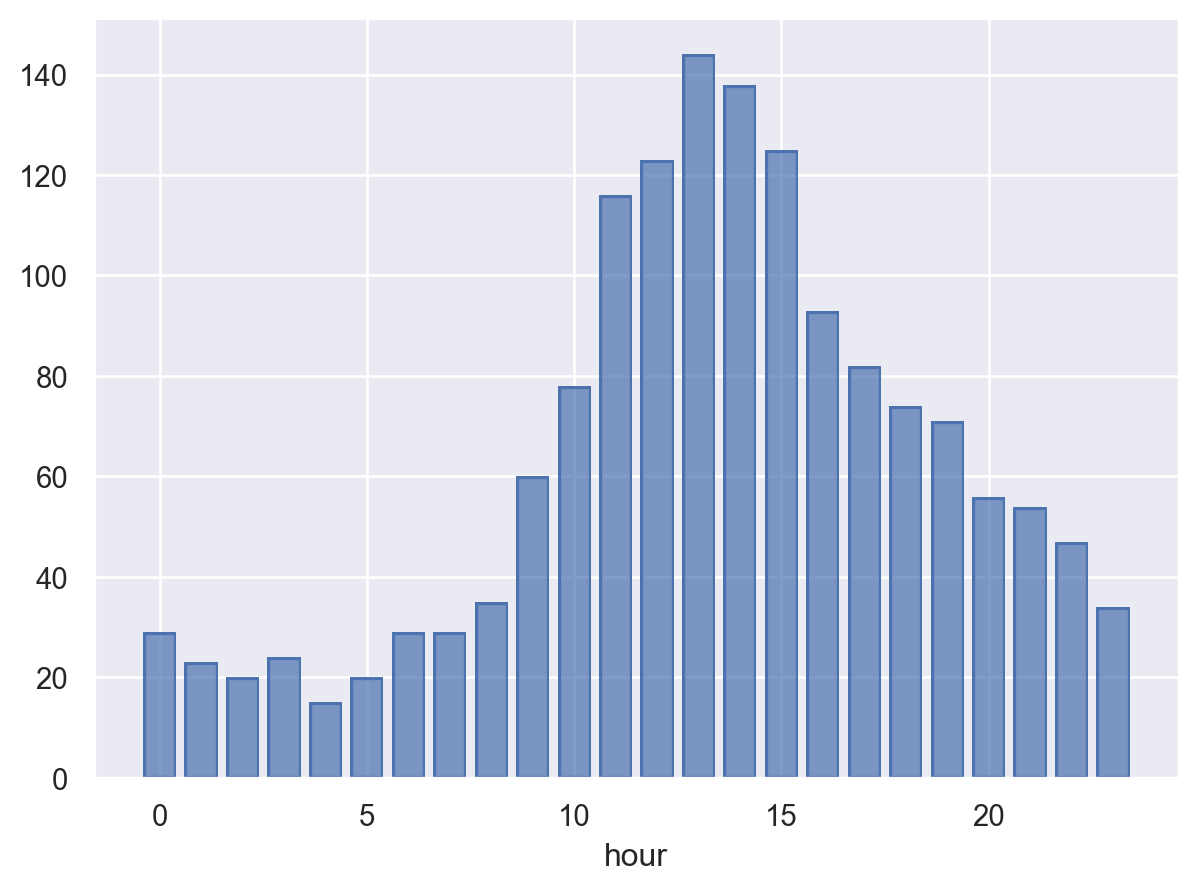

In [15]:
# 시간별 화재발생 빈도
(
    so.Plot(fire_t, x='hour')
      .add(so.Bar(), so.Count())
)

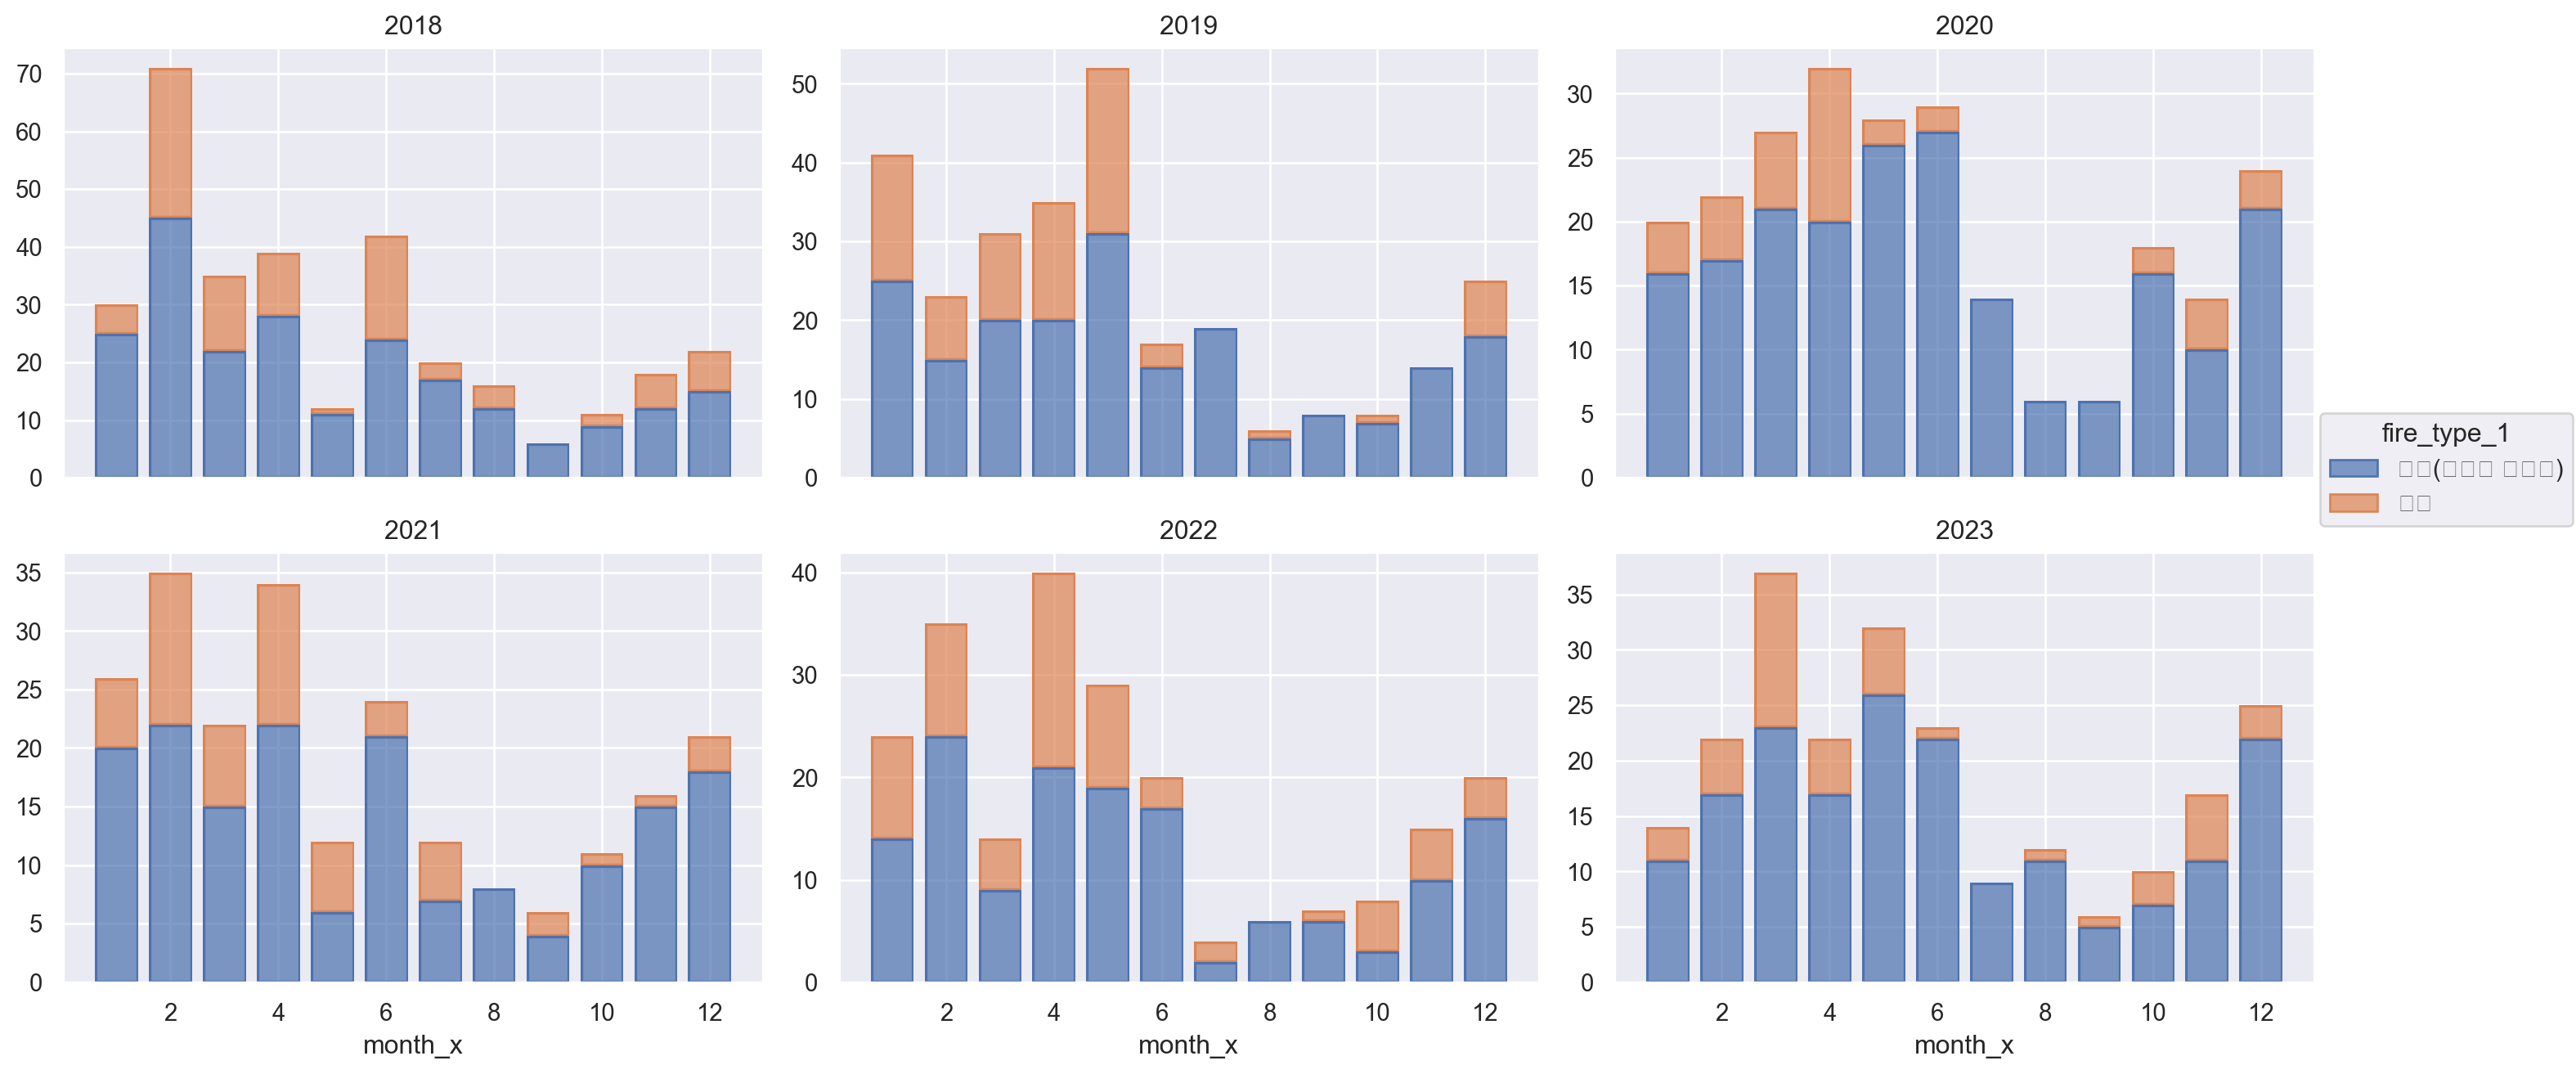

In [20]:
# 시기별 화재발생 빈도 + 화재 유형 같이 관찰
(
    so.Plot(fire_t, x='month_x', color='fire_type_1')
      .add(so.Bar(), so.Count(), so.Stack())
      .facet('year_x', wrap=3)
      .share(y=False)
      .layout(size=(15,7))
)

In [21]:
factor_sort = factor_t.reset_index(name='prop(%)').query('ignition_factor_category_1 == "부주의"')['ignition_factor_category_2'].tolist()
fire_t['ignition_factor_category_2'] = pd.Categorical(fire_t['ignition_factor_category_2'], categories= factor_sort, ordered=True)

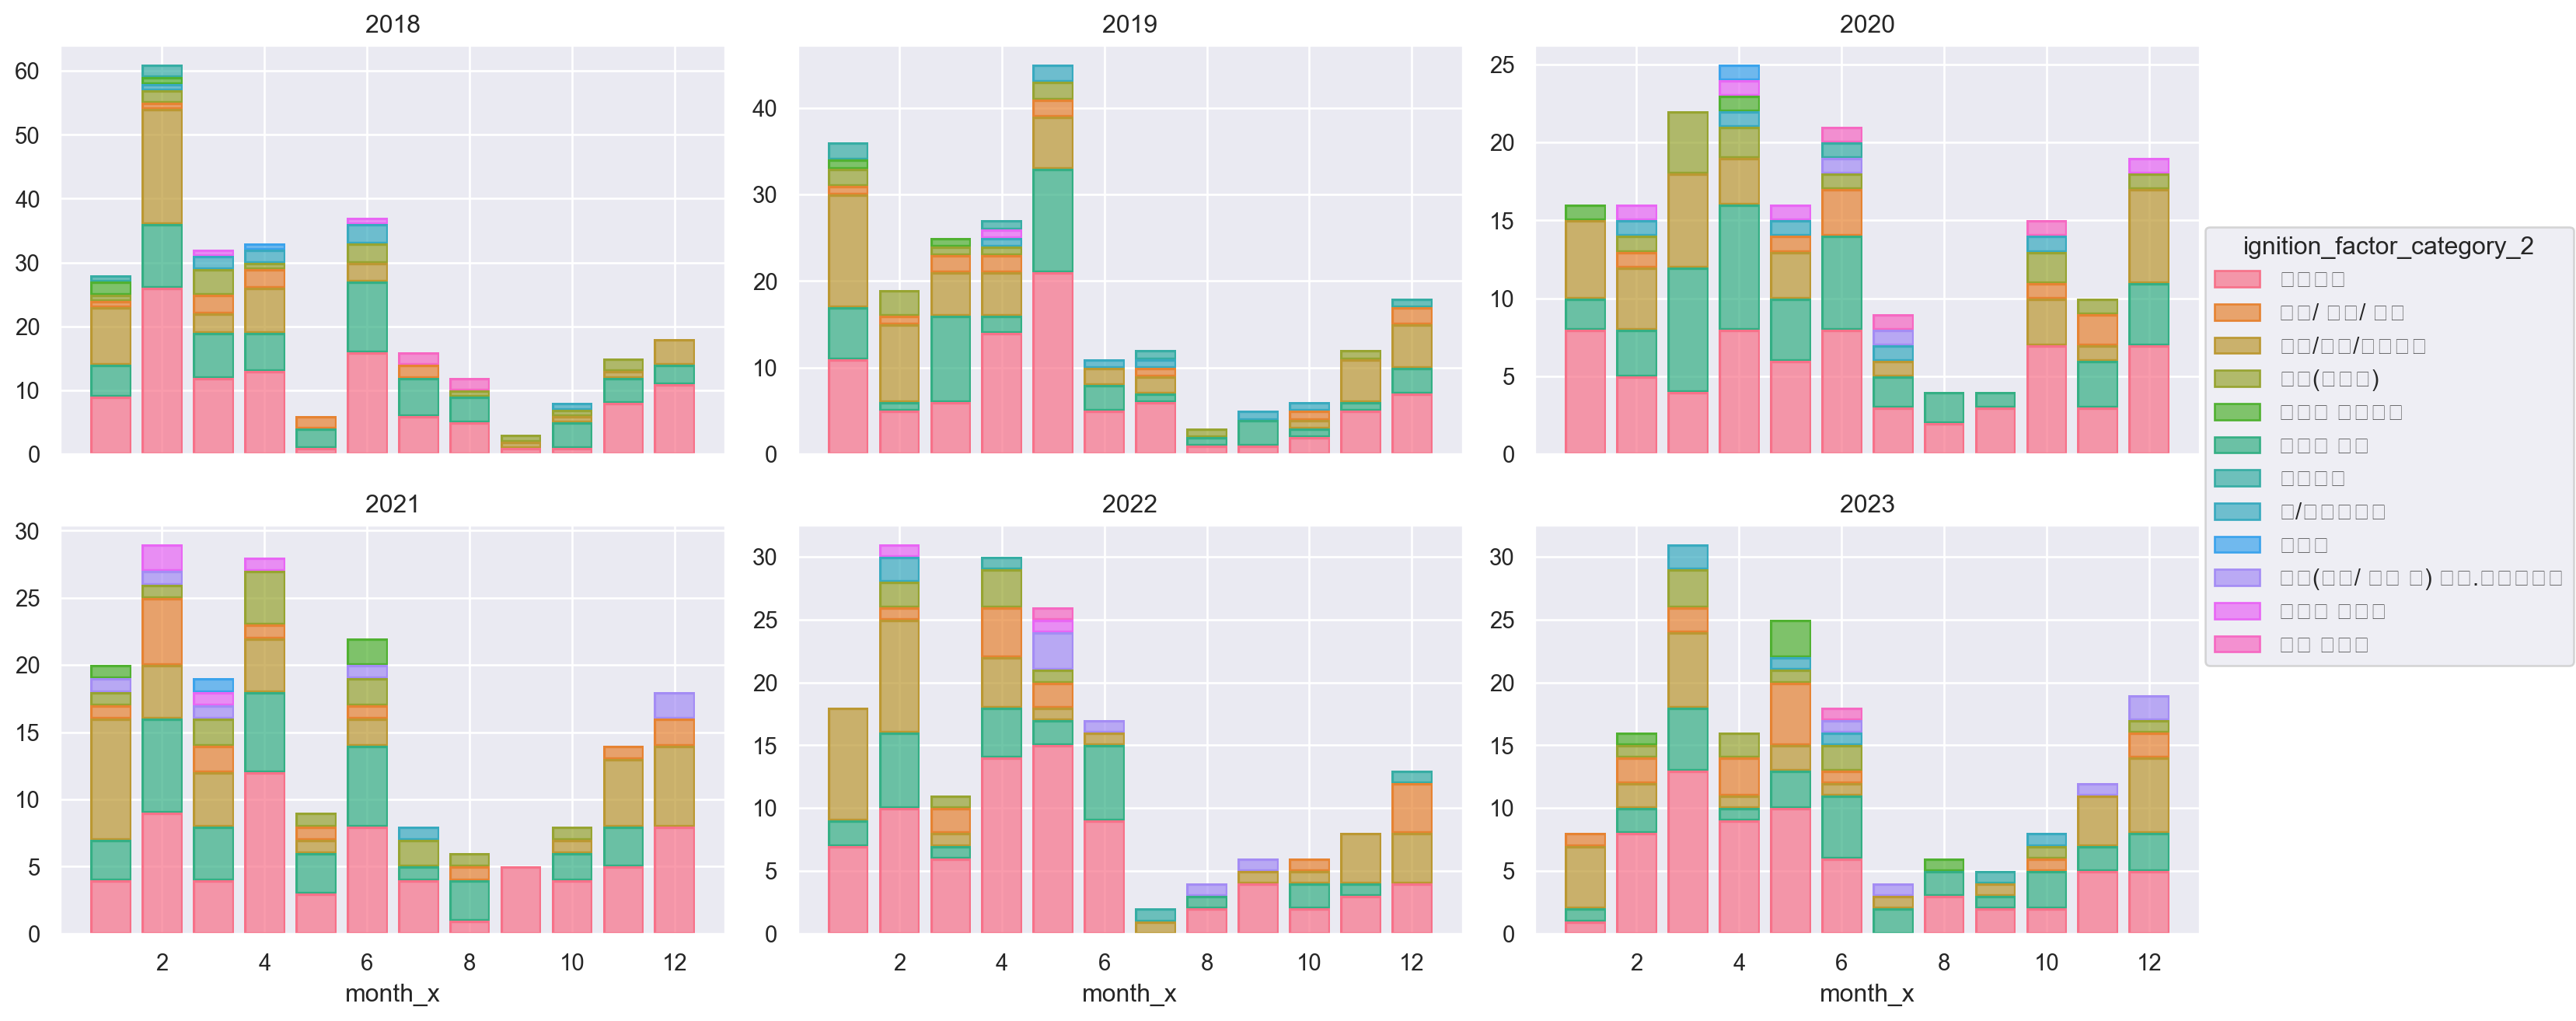

In [23]:
# 시기별 화재발생 빈도 + 화재 요인 같이 관찰
(
    so.Plot(fire_t.query('ignition_factor_category_1 == "부주의"'), x='month_x', color='ignition_factor_category_2')
      .add(so.Bar(), so.Count(), so.Stack())
      .facet('year_x', wrap=3)
      .share(y=False)
      .layout(size=(15,7))
)

In [ ]:
factor_sort

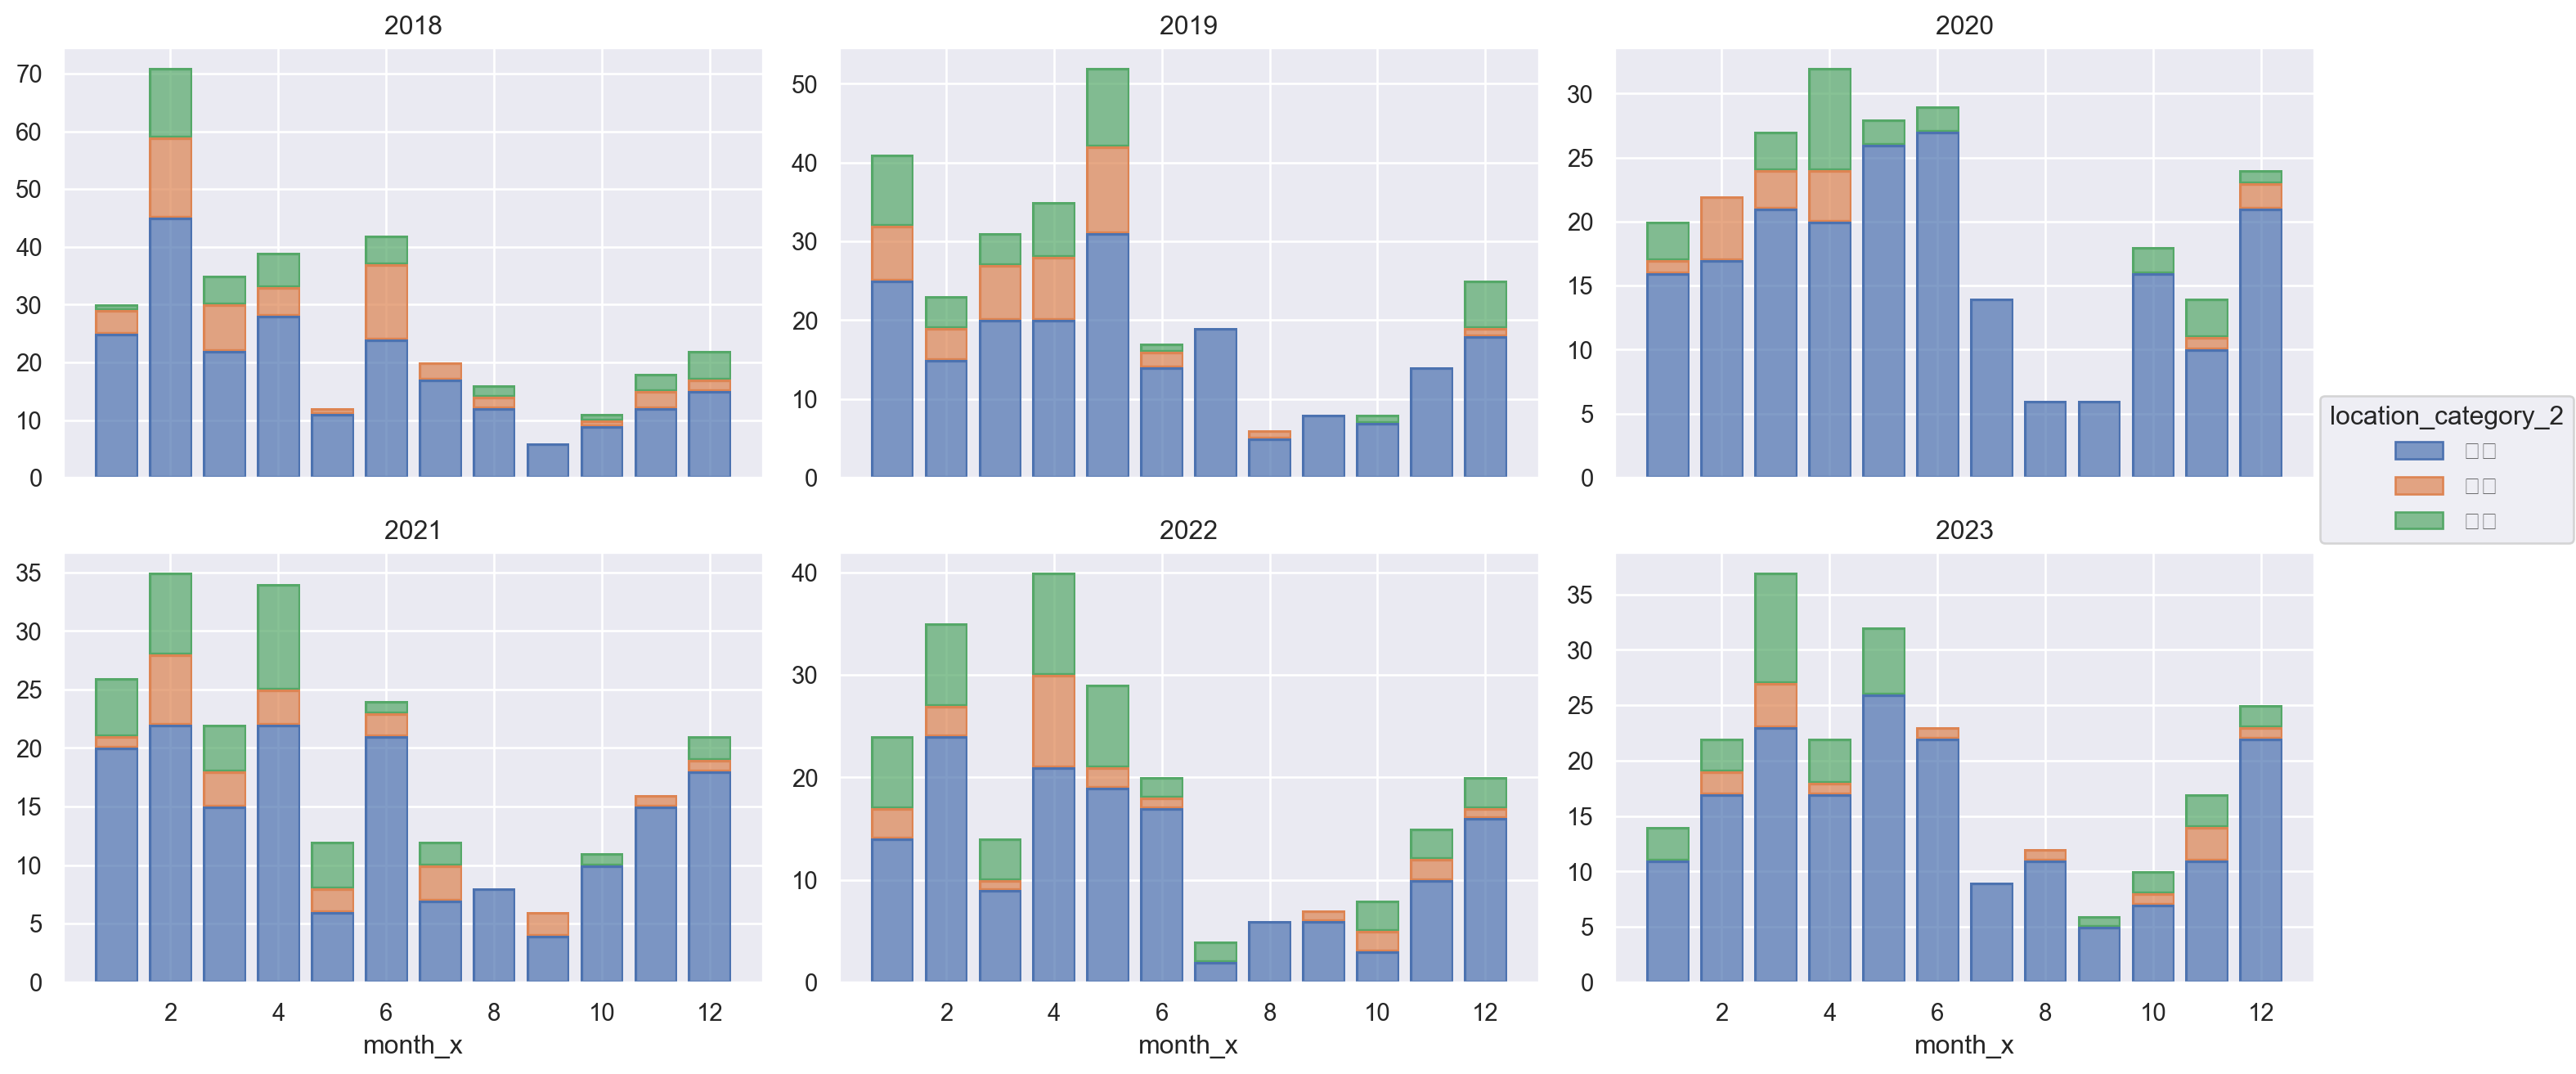

In [24]:
# 시기별 화재발생 빈도 + 화재 위치 같이 관찰
(
    so.Plot(fire_t, x='month_x', color='location_category_2')
      .add(so.Bar(), so.Count(), so.Stack())
      .facet('year_x', wrap=3)
      .share(y=False)
      .layout(size=(15,7))
)

In [25]:
fire_t['location_category_2'].unique()

array(['야외', '들불', '산불'], dtype=object)

- 야외 : 여름 기간과 다른 기간 사이의 차이가 큼
- 들불 : 다른 장소 카테고리에 비해 계절 간의 차이가 크지는 않음
- 산불 : 여름에는 거의 발생하지 않다가 2~5월에 집중분포하는 양상

In [26]:
# 태백 컬럼 생성
merged_t = merged.copy()
filter = ((merged_t['district_1']=="강원특별자치도") & (merged_t['district_2'].isin(["정선군", "평창군", "태백시", "인제군", "양구군", "삼척시", "강릉시"]))) | ((merged_t['district_1']=="경상북도") & (merged_t['district_2'].isin(["울진군", "영덕군", "영양군"])))
merged_t['taebaek'] = np.where(filter, 'taebaek', 'else')
merged_t

,index,district_1,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,...,injury,property_damage,location_category_1,location_category_2,location_category_3,month_y,ym,hour,season,taebaek
0,0,서울특별시,종로구,108,3.8,-5.1,8.9,0.0,3.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
1,1,서울특별시,종로구,108,1.8,-4.3,6.1,0.0,4.9,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
2,2,서울특별시,종로구,108,-0.4,-7.1,6.7,0.0,3.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
3,3,서울특별시,종로구,108,-0.7,-8.7,8.0,0.0,3.5,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
4,4,서울특별시,종로구,108,1.6,-5.6,7.2,0.0,3.6,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539574,558231,강원특별자치도,양양군,670,6.6,-3.0,9.6,0.0,4.1,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
539575,558232,강원특별자치도,양양군,670,7.4,-3.8,11.2,0.0,6.5,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
539576,558233,강원특별자치도,양양군,670,9.3,1.6,7.7,0.0,7.2,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else
539577,558234,강원특별자치도,양양군,670,6.0,1.4,4.6,0.5,5.8,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else


In [27]:
# 화재 발생 여부 컬럼 생성
merged_t['fire'] = np.where(merged_t['ym'].isna(), 'fire X', 'fire O')
merged_t

,index,district_1,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,...,property_damage,location_category_1,location_category_2,location_category_3,month_y,ym,hour,season,taebaek,fire
0,0,서울특별시,종로구,108,3.8,-5.1,8.9,0.0,3.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
1,1,서울특별시,종로구,108,1.8,-4.3,6.1,0.0,4.9,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
2,2,서울특별시,종로구,108,-0.4,-7.1,6.7,0.0,3.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
3,3,서울특별시,종로구,108,-0.7,-8.7,8.0,0.0,3.5,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
4,4,서울특별시,종로구,108,1.6,-5.6,7.2,0.0,3.6,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539574,558231,강원특별자치도,양양군,670,6.6,-3.0,9.6,0.0,4.1,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
539575,558232,강원특별자치도,양양군,670,7.4,-3.8,11.2,0.0,6.5,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
539576,558233,강원특별자치도,양양군,670,9.3,1.6,7.7,0.0,7.2,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X
539577,558234,강원특별자치도,양양군,670,6.0,1.4,4.6,0.5,5.8,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,else,fire X


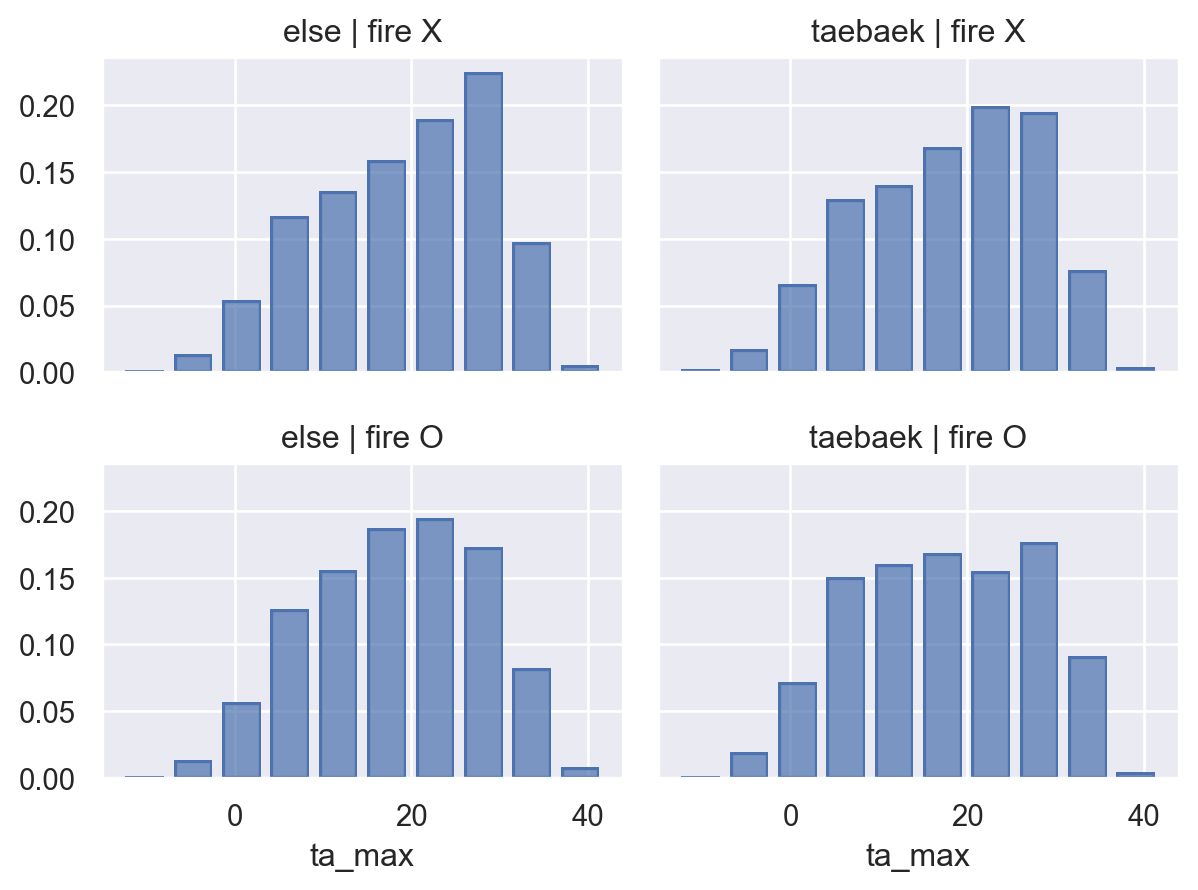

In [28]:
# 화재 발생했을 때와 안했을 떄의 최대 기온 양상 시각화
(
    so.Plot(merged_t, x='ta_max')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

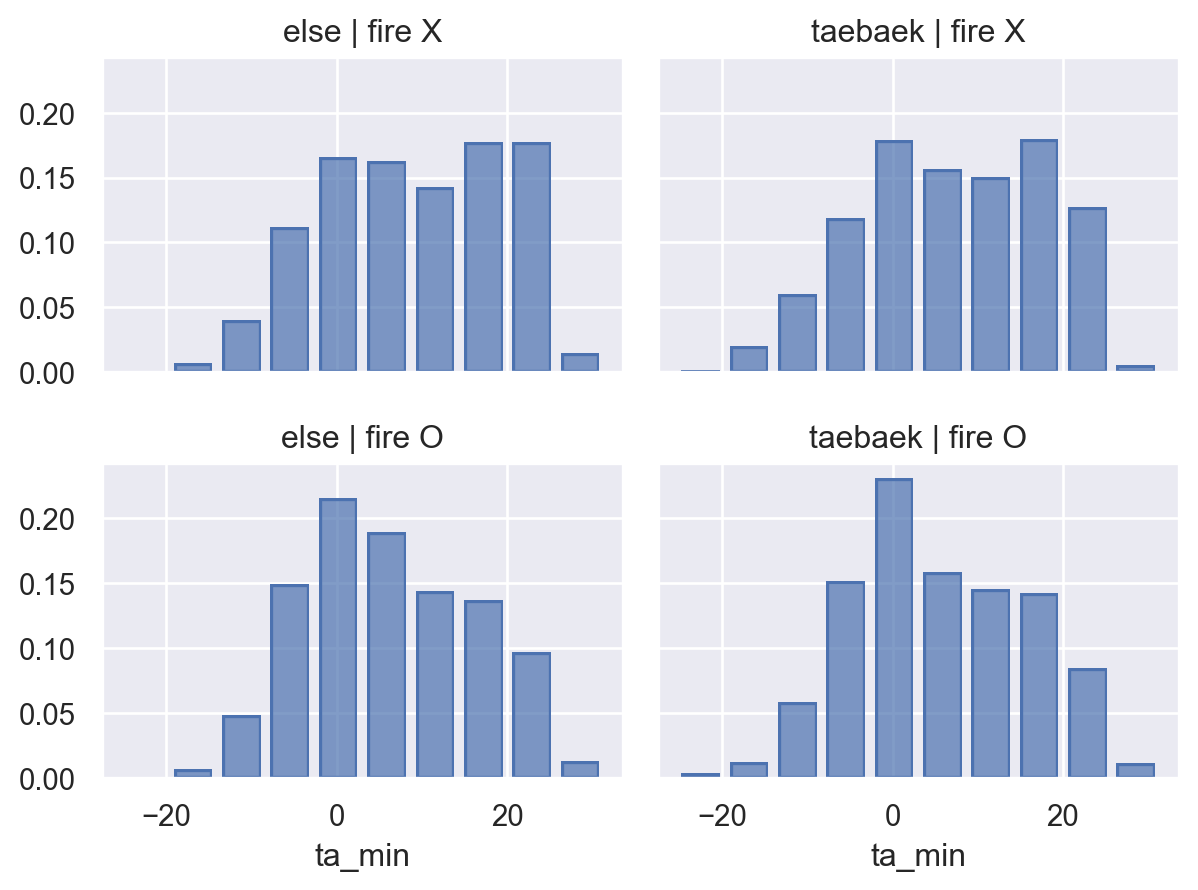

In [29]:
# 화재 발생했을 때와 안했을 떄의 최소 기온 양상 시각화
(
    so.Plot(merged_t, x='ta_min')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

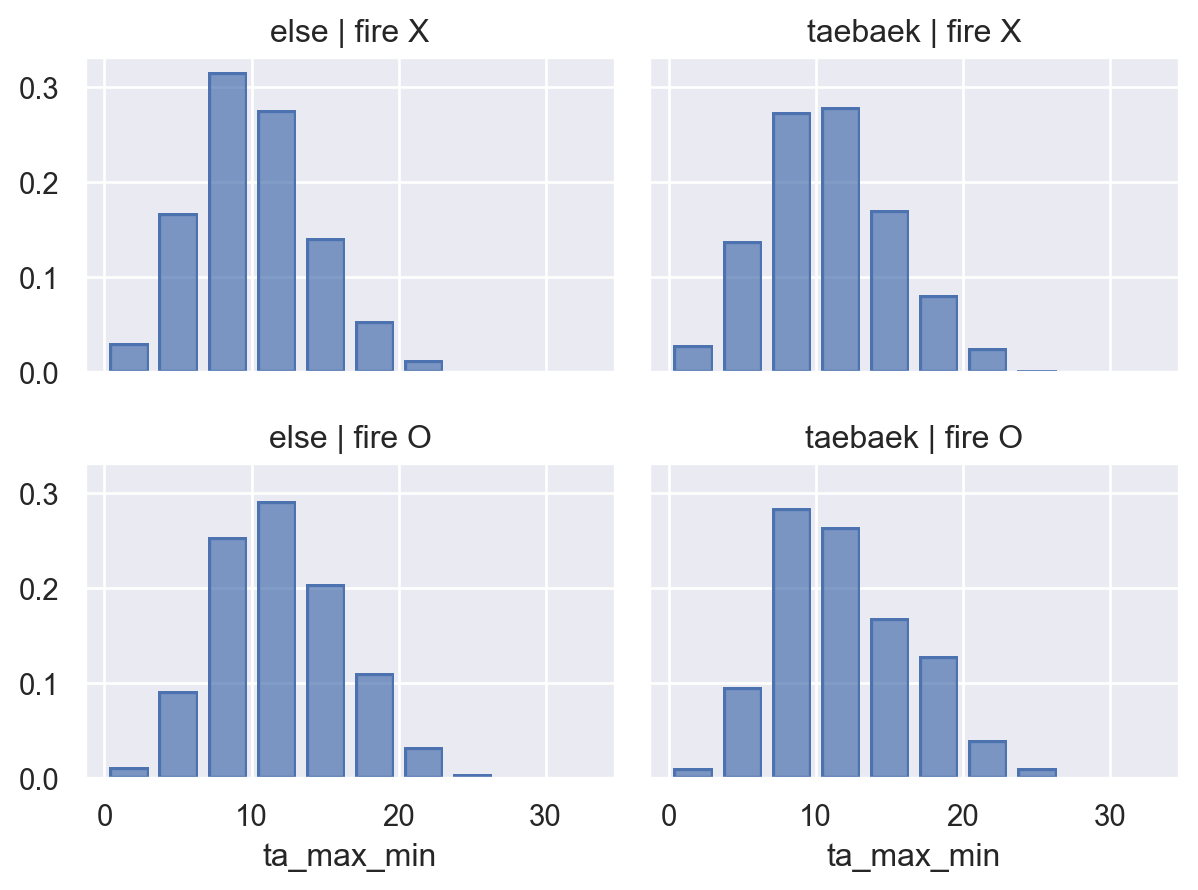

In [30]:
# 화재 발생했을 때와 안했을 떄의 일교차 양상 시각화
(
    so.Plot(merged_t, x='ta_max_min')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

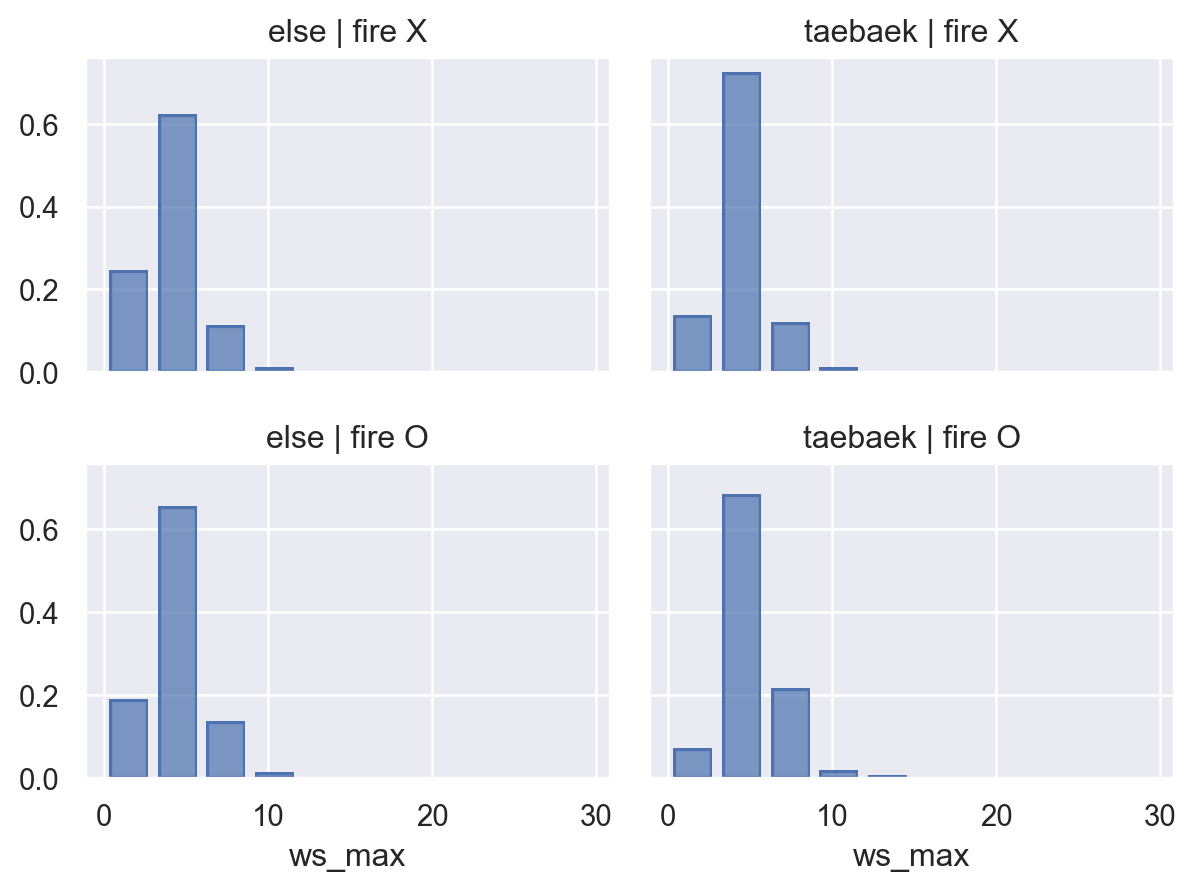

In [31]:
# 화재 발생했을 때와 안했을 떄의 최대 풍속 양상 시각화
(
    so.Plot(merged_t, x='ws_max')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

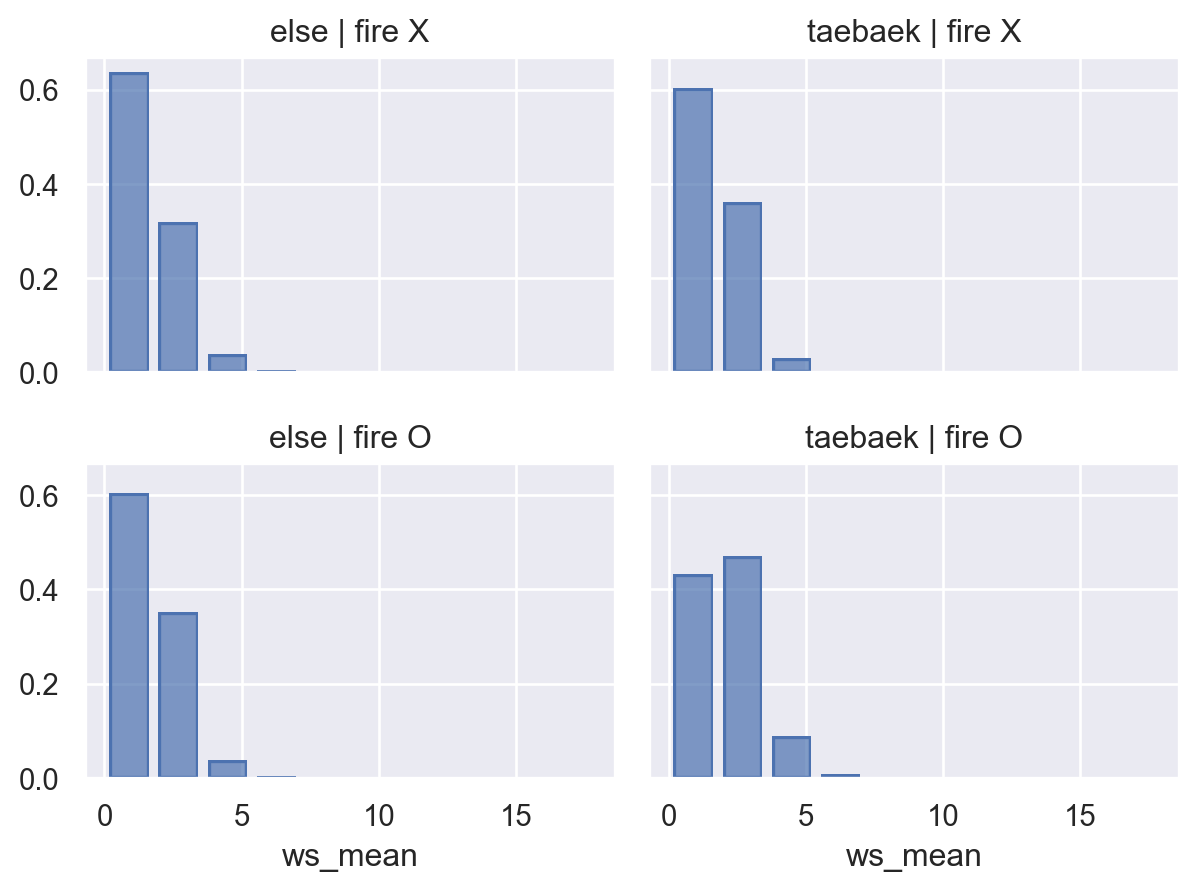

In [32]:
# 화재 발생했을 때와 안했을 떄의 최대 풍속 양상 시각화
(
    so.Plot(merged_t, x='ws_mean')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

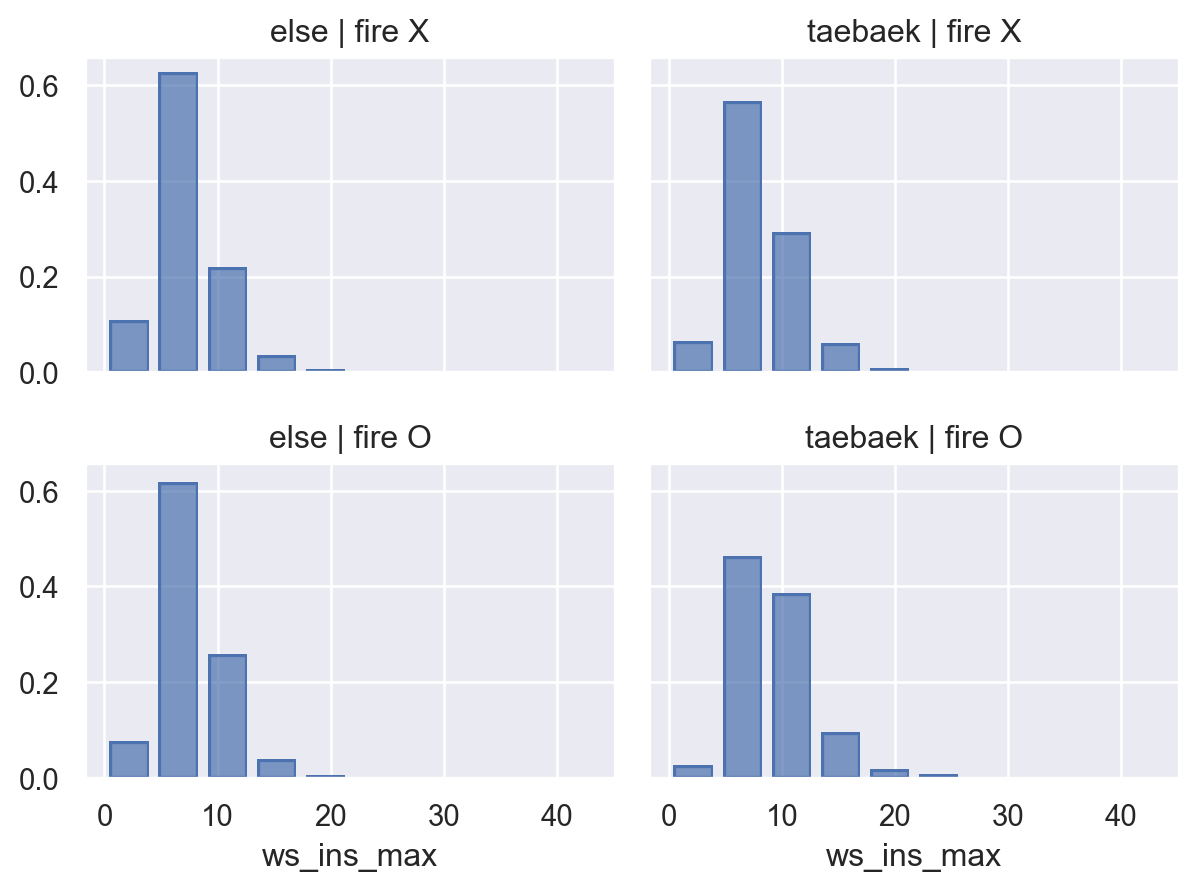

In [33]:
# 화재 발생했을 때와 안했을 떄의 순간 최대 풍속 양상 시각화
(
    so.Plot(merged_t, x='ws_ins_max')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

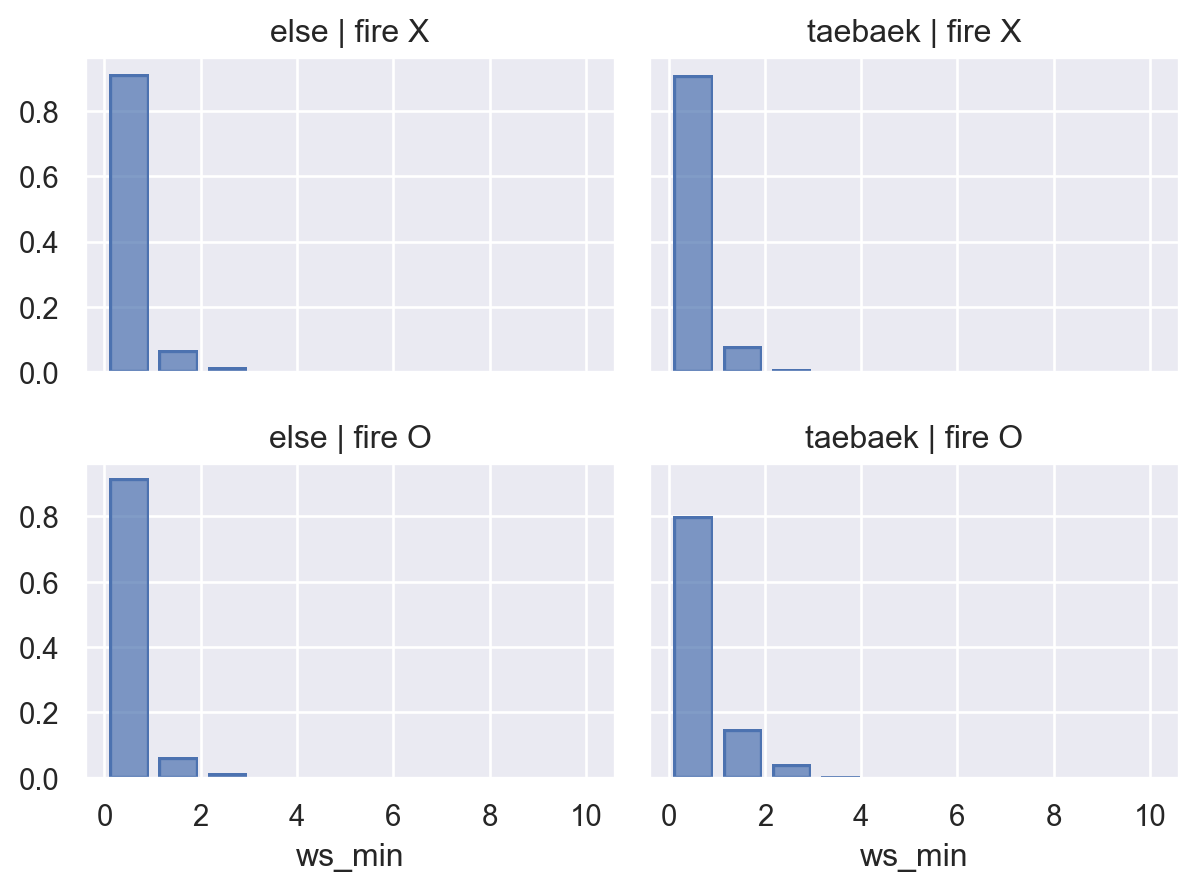

In [34]:
# 화재 발생했을 때와 안했을 떄의 최저 풍속 양상 시각화
(
    so.Plot(merged_t, x='ws_min')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

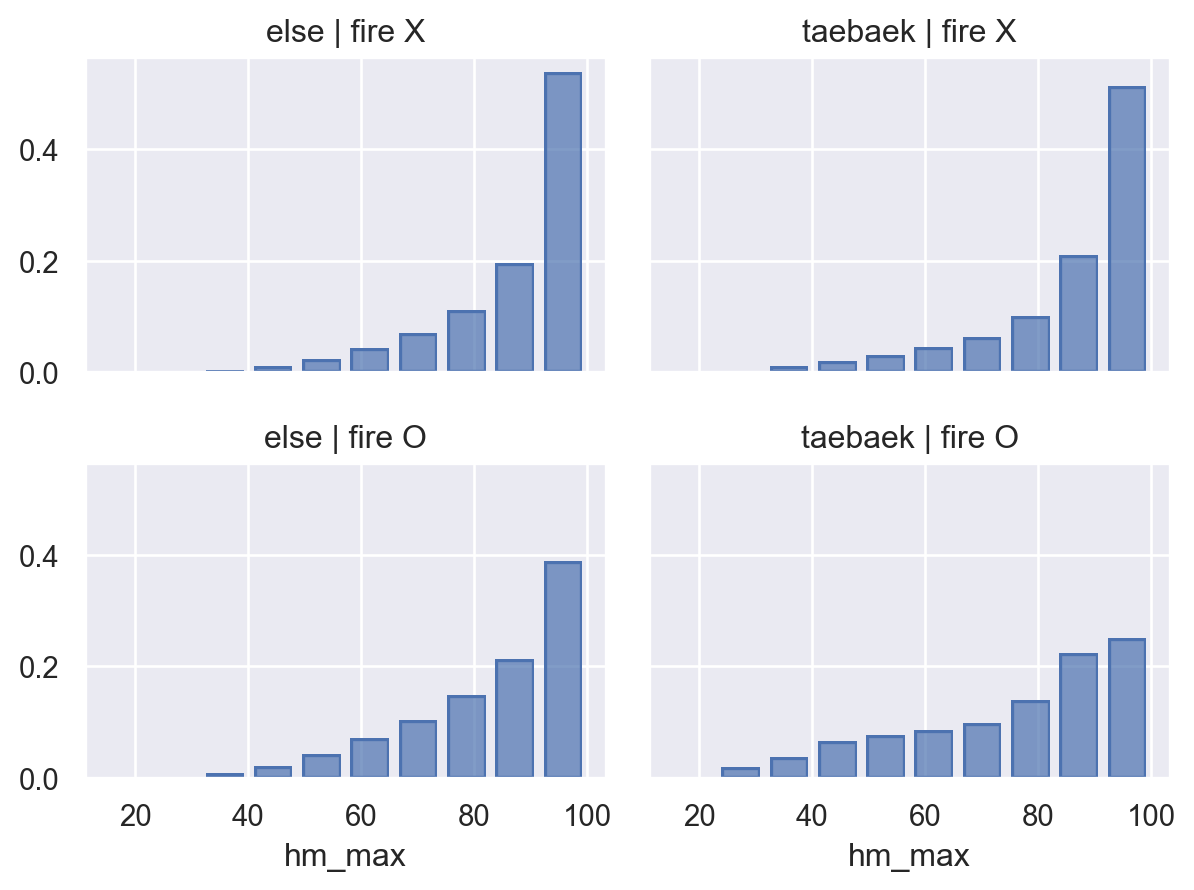

In [35]:
# 화재 발생했을 때와 안했을 떄의 최대 습도 양상 시각화
(
    so.Plot(merged_t, x='hm_max')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

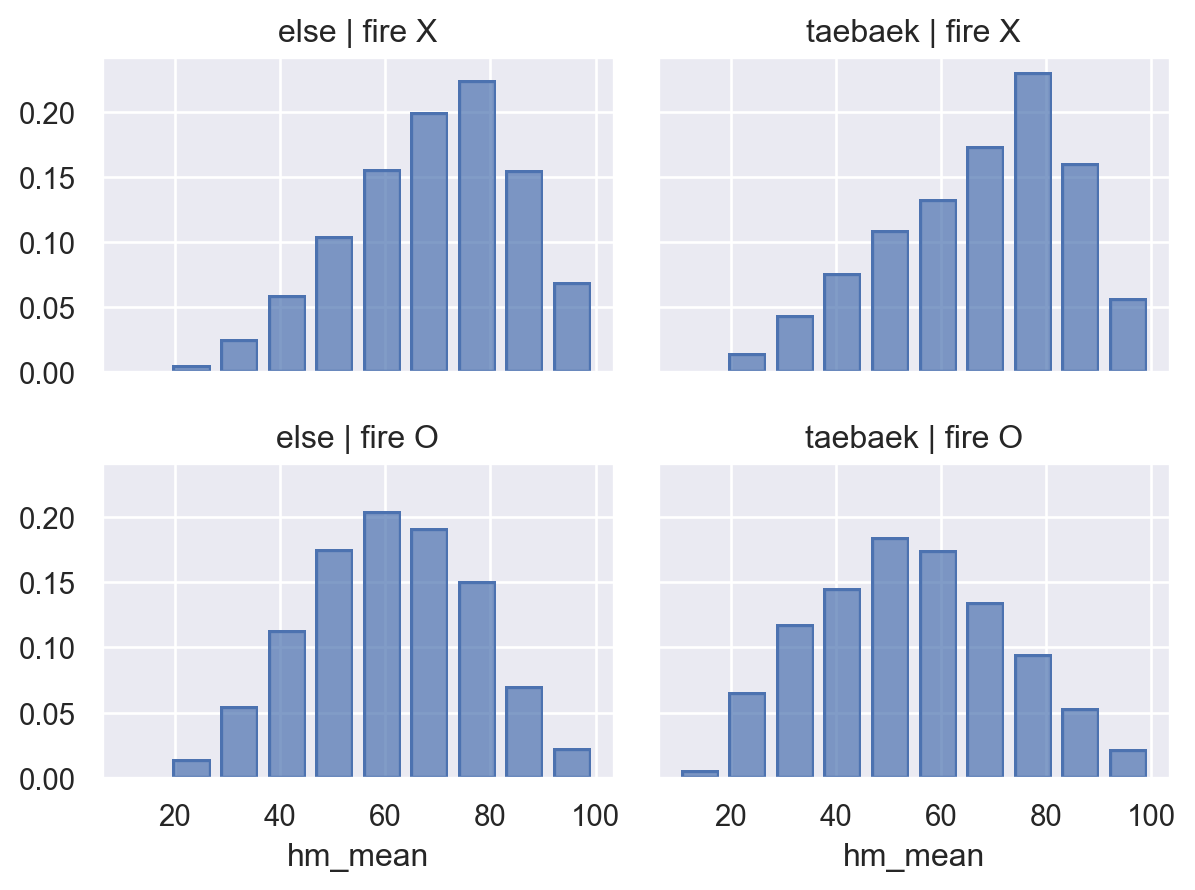

In [36]:
# 화재 발생했을 때와 안했을 떄의 평균 습도 양상 시각화
(
    so.Plot(merged_t, x='hm_mean')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

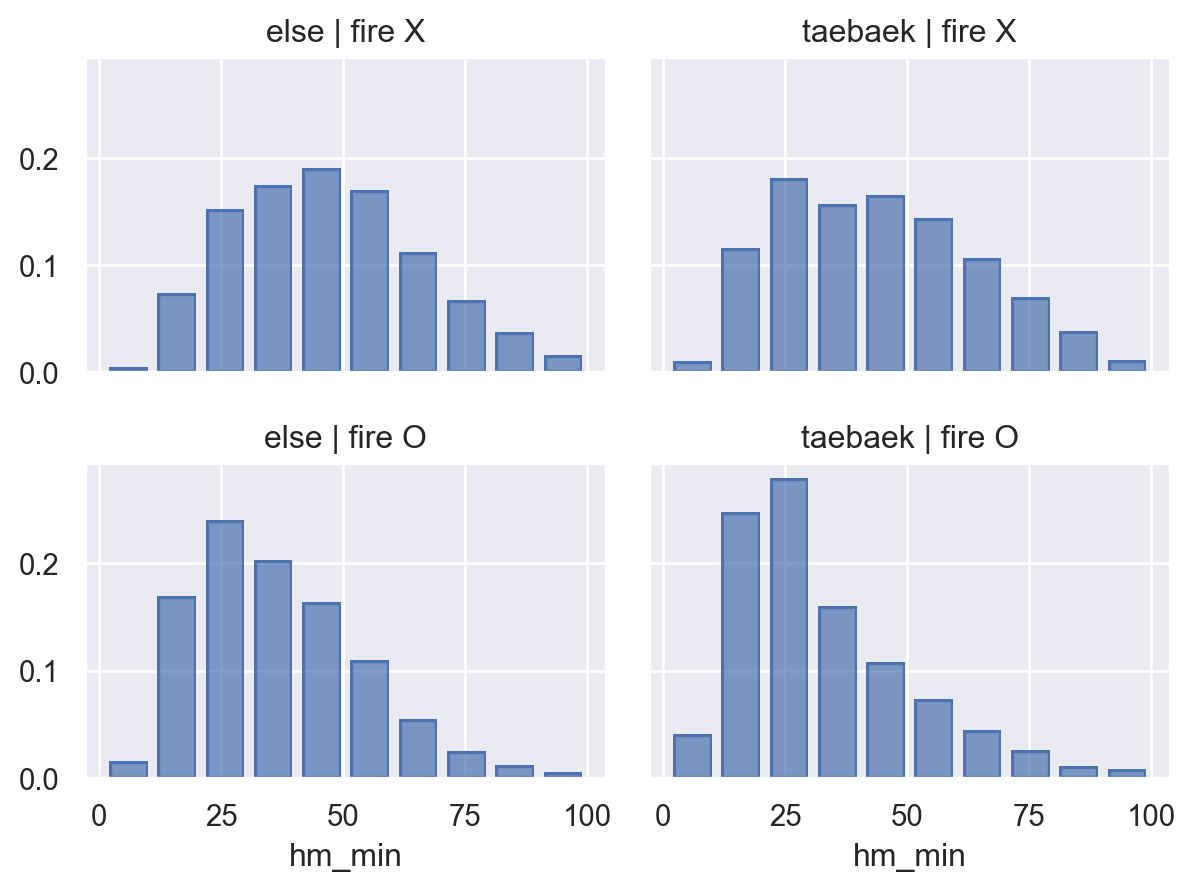

In [37]:
# 화재 발생했을 때와 안했을 떄의 최저 습도 양상 시각화
(
    so.Plot(merged_t, x='hm_min')
      .add(so.Bar(), so.Hist('proportion', bins=10, common_norm=False))
      .facet(row = 'fire', col = 'taebaek')
)

In [38]:
# 태백산 데이터의 기상 전체 분포
merged_T = merged_t.query('taebaek == "taebaek"')
merged_T['ta_max_cut'] = pd.cut(merged_T['ta_max'], bins=[-13, 0, 10, 20, 30, 42], labels=[1, 2, 3, 4, 5])
merged_T['ws_max_cut'] = pd.cut(merged_T['ws_max'], bins=[-1, 3, 5, 7, 30], labels=[1, 2, 3, 4])
merged_T['hm_max_cut'] = pd.cut(merged_T['hm_max'], bins=[0, 50, 70, 80, 90, 100], labels=[1, 2, 3, 4, 5])

cut_all = merged_T.groupby(['ta_max_cut', 'hm_max_cut', 'ws_max_cut']).size().reset_index(name='n').sort_values('n', ascending=False)
cut_all['prop'] = (cut_all['n'] / cut_all['n'].sum())*100
cut_all

,ta_max_cut,hm_max_cut,ws_max_cut,n,prop
77,4,5,2,3346,15.205635
57,3,5,2,1860,8.452624
76,4,5,1,1276,5.798682
97,5,5,2,1092,4.962509
78,4,5,3,851,3.867303
...,...,...,...,...,...
40,3,1,1,1,0.004544
84,5,2,1,1,0.004544
80,5,1,1,0,0.000000
60,4,1,1,0,0.000000


In [39]:
# 화재발생 + 태백산 데이터만 정리
fire_t = merged_t.query('fire == "fire O" and taebaek == "taebaek"')
fire_t

,index,district_1,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,...,property_damage,location_category_1,location_category_2,location_category_3,month_y,ym,hour,season,taebaek,fire
426581,442561,경상북도,영양군,801,-4.9,-16.9,12.0,0.0,7.0,13.1,...,1351.0,임야,산불,사유림,2.0,2018-02,13.0,winter,taebaek,fire O
426631,442611,경상북도,영양군,801,23.2,7.5,15.7,0.0,4.7,9.5,...,2000.0,임야,산불,국유림,3.0,2018-03,12.0,spring,taebaek,fire O
426912,442892,경상북도,영양군,801,3.5,-13.7,17.2,0.0,3.5,6.4,...,7370.0,임야,산불,사유림,1.0,2019-01,13.0,winter,taebaek,fire O
426928,442908,경상북도,영양군,801,8.9,-6.8,15.7,0.0,4.0,8.2,...,2310.0,임야,산불,공유림,1.0,2019-01,12.0,winter,taebaek,fire O
427038,443018,경상북도,영양군,801,24.2,7.5,16.7,0.0,4.5,10.0,...,895.0,임야,산불,국유림,5.0,2019-05,19.0,spring,taebaek,fire O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535105,553760,강원특별자치도,인제군,211,19.2,6.3,12.9,0.0,3.5,7.4,...,0.0,임야,들불,기타 들불,10.0,2023-10,13.0,fall,taebaek,fire O
535112,553767,강원특별자치도,인제군,211,19.9,5.0,14.9,0.0,3.7,8.5,...,0.0,기타,야외,쓰레기,10.0,2023-10,13.0,fall,taebaek,fire O
535121,553776,강원특별자치도,인제군,211,17.8,1.3,16.5,2.4,5.6,10.2,...,0.0,임야,산불,국유림,11.0,2023-11,11.0,fall,taebaek,fire O
535126,553781,강원특별자치도,인제군,211,9.2,-4.0,13.2,0.0,3.7,7.4,...,0.0,임야,들불,군.경사격장,11.0,2023-11,10.0,fall,taebaek,fire O


In [40]:
# 태백산맥 중 화재가 발생했을 때의 유리한 기상 분포
fire_cut = fire_t.copy()
fire_cut['ta_max_cut'] = pd.cut(fire_cut['ta_max'], bins = [-13, 0, 10, 20, 30, 42], labels=[1,2,3,4,5])
fire_cut['ws_max_cut'] = pd.cut(fire_cut['ws_max'], bins = [-1, 3, 5, 7, 30], labels=[1,2,3,4])
fire_cut['hm_max_cut'] = pd.cut(fire_cut['hm_max'], bins = [0, 50, 70, 80, 90, 100], labels=[1,2,3,4,5])

fire_cut_t = fire_cut.groupby(['ta_max_cut', 'hm_max_cut', 'ws_max_cut']).size().reset_index(name='fire_n').sort_values('fire_n', ascending=False)
fire_cut_t = fire_cut_t.sort_values('fire_n', ascending=False)
fire_cut_t

,ta_max_cut,hm_max_cut,ws_max_cut,fire_n
77,4,5,2,106
73,4,4,2,87
57,3,5,2,83
26,2,2,3,56
22,2,1,3,54
...,...,...,...,...
64,4,2,1,0
80,5,1,1,0
84,5,2,1,0
0,1,1,1,0


In [41]:
print(fire_cut['ta_max_cut'].value_counts())
print(fire_cut['ws_max_cut'].value_counts())
print(fire_cut['hm_max_cut'].value_counts())

ta_max_cut
4    477
3    439
2    375
5    172
1     56
Name: count, dtype: int64
ws_max_cut
2    746
3    493
4    155
1    125
Name: count, dtype: int64
hm_max_cut
5    442
4    364
2    303
3    206
1    204
Name: count, dtype: int64


In [42]:
# 태백산맥 데이터 중 화재발생 확률이 높았던 기상 조건
new_merge = fire_cut_t.merge(cut_all.iloc[:,:4])
new_merge['prop'] = new_merge['fire_n'] / new_merge['n']
new_merge.query('n>10').sort_values('prop', ascending=False)[:20]

,ta_max_cut,hm_max_cut,ws_max_cut,fire_n,n,prop
58,5,1,3,7,14,0.500000
29,5,2,3,17,35,0.485714
37,3,1,4,12,31,0.387097
53,4,1,4,9,24,0.375000
65,5,1,2,4,11,0.363636
31,4,1,3,17,62,0.274194
41,4,2,4,10,41,0.243902
28,3,1,3,18,78,0.230769
34,2,1,4,13,58,0.224138
44,5,2,2,10,46,0.217391


In [43]:
# 기상조건별 화재발생 분포
merged_t['ta_max_cut'] = pd.cut(merged_t['ta_max'], bins = [-13, 0, 10, 20, 30, 42], labels=[1,2,3,4,5])
merged_t['ws_max_cut'] = pd.cut(merged_t['ws_max'], bins = [-1, 3, 5, 7, 30], labels=[1,2,3,4])
merged_t['hm_max_cut'] = pd.cut(merged_t['hm_max'], bins = [0, 50, 70, 80, 90, 100], labels=[1,2,3,4,5])
merged_t
merged_o = merged_t.query('fire == "fire O"')
merged_x = merged_t.query('fire == "fire X"')

cut_1 = merged_o.groupby(['ta_max_cut', 'hm_max_cut', 'ws_max_cut']).size().reset_index(name='fire_n').sort_values('fire_n', ascending=False)
cut_1 = cut_1.sort_values('fire_n', ascending=False)
cut_1

,ta_max_cut,hm_max_cut,ws_max_cut,fire_n
77,4,5,2,4826
57,3,5,2,3130
76,4,5,1,2218
73,4,4,2,2049
53,3,4,2,1791
...,...,...,...,...
87,5,2,4,12
83,5,1,4,10
82,5,1,3,10
81,5,1,2,9


In [44]:
# 전체 기상조건 분포
cut_2 = merged_t.groupby(['ta_max_cut', 'hm_max_cut', 'ws_max_cut']).size().reset_index(name='n').sort_values('n', ascending=False)
cut_2 = cut_2.sort_values('n', ascending=False)
cut_2

,ta_max_cut,hm_max_cut,ws_max_cut,n
77,4,5,2,68910
76,4,5,1,41987
57,3,5,2,36575
97,5,5,2,25846
56,3,5,1,23022
...,...,...,...,...
87,5,2,4,56
81,5,1,2,48
82,5,1,3,26
83,5,1,4,16


In [45]:
# 전체 데이터에서 화재발생률이 높았건 기상 조건
popmean = len(merged_o) / len(merged)
new_merge2 = cut_1.merge(cut_2)
new_merge2['prop'] = new_merge2['fire_n'] / new_merge2['n']
new_merge2 = new_merge2.sort_values('prop', ascending=False)
new_merge2.query('prop > @popmean')

,ta_max_cut,hm_max_cut,ws_max_cut,fire_n,n,prop
96,5,1,4,10,16,0.625000
81,4,1,4,45,114,0.394737
97,5,1,3,10,26,0.384615
99,5,1,1,1,4,0.250000
75,5,2,3,65,287,0.226481
...,...,...,...,...,...,...
13,2,4,2,1069,10736,0.099572
85,5,4,4,35,356,0.098315
77,1,3,1,54,554,0.097473
80,1,2,4,47,483,0.097308


In [47]:
merged_t.query('ta_max_cut == 5 and hm_max_cut == 1').value_counts('month_x')

month_x
5    55
6    30
4     7
8     2
Name: count, dtype: int64

In [49]:
merged_t.query('ta_max_cut == 5 and hm_max_cut == 1 and not ym.isna()').value_counts('month_x')

month_x
5    21
6     5
4     4
Name: count, dtype: int64